In [25]:
# ! pip install numpy
# ! pip install pandas
# ! pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
db = pd.read_csv("data/player_stats_injuries.csv")
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLAYER_ID             5578 non-null   int64  
 1   PLAYER_NAME           5578 non-null   object 
 2   SEASON                5578 non-null   object 
 3   SEASON_NUM            5578 non-null   float64
 4   AGE                   5578 non-null   float64
 5   PLAYER_HEIGHT_INCHES  5578 non-null   object 
 6   PLAYER_WEIGHT         5578 non-null   object 
 7   GP                    5578 non-null   int64  
 8   MIN                   5578 non-null   float64
 9   USG_PCT               5578 non-null   float64
 10  PACE                  5578 non-null   float64
 11  POSS                  5578 non-null   int64  
 12  FGA_PG                5578 non-null   float64
 13  DRIVES                5578 non-null   float64
 14  DRIVE_FGA             5578 non-null   float64
 15  DRIVE_PASSES         

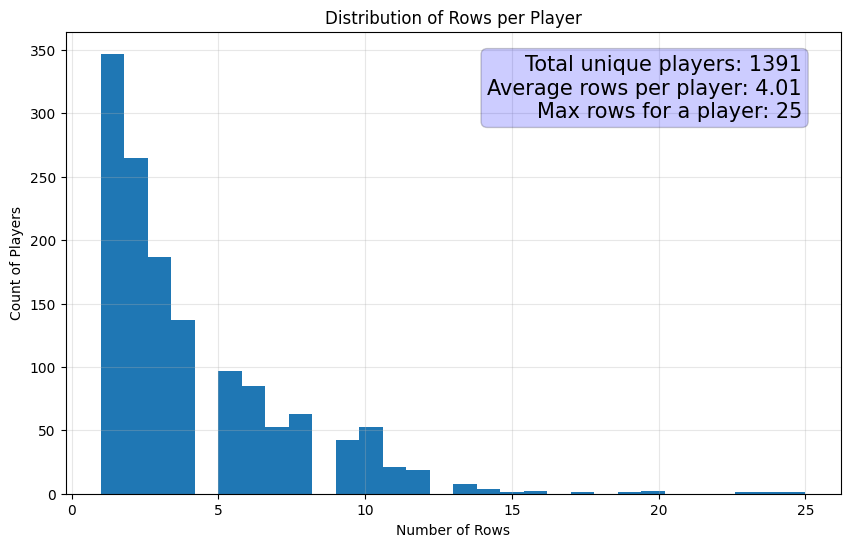

In [5]:
player_counts = db['PLAYER_ID'].value_counts().reset_index()
player_counts.columns = ['player_id', 'count']

textstr = '\n'.join((
    f'Total unique players: {len(player_counts)}',
    f'Average rows per player: {player_counts["count"].mean():.2f}',
    f'Max rows for a player: {player_counts["count"].max()}'))

plt.figure(figsize=(10, 6))
plt.hist(player_counts['count'], bins=30)
plt.title('Distribution of Rows per Player')

props = dict(boxstyle='round', facecolor='blue', alpha=0.2)
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=15,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.xlabel('Number of Rows')
plt.ylabel('Count of Players')
plt.grid(True, alpha=0.3)
plt.show()


In [6]:
unique_seasons = db['SEASON'].unique()
unique_season_nums = db['SEASON_NUM'].unique()

print("Unique SEASON values:", unique_seasons)
print("Unique SEASON_NUM values:", unique_season_nums)

Unique SEASON values: ['22-23' '21-22' '20-21' '19-20' '18-19' '17-18' '16-17' '15-16' '14-15'
 '13-14']
Unique SEASON_NUM values: [22.5 21.5 20.5 19.5 18.5 17.5 16.5 15.5 14.5 13.5]


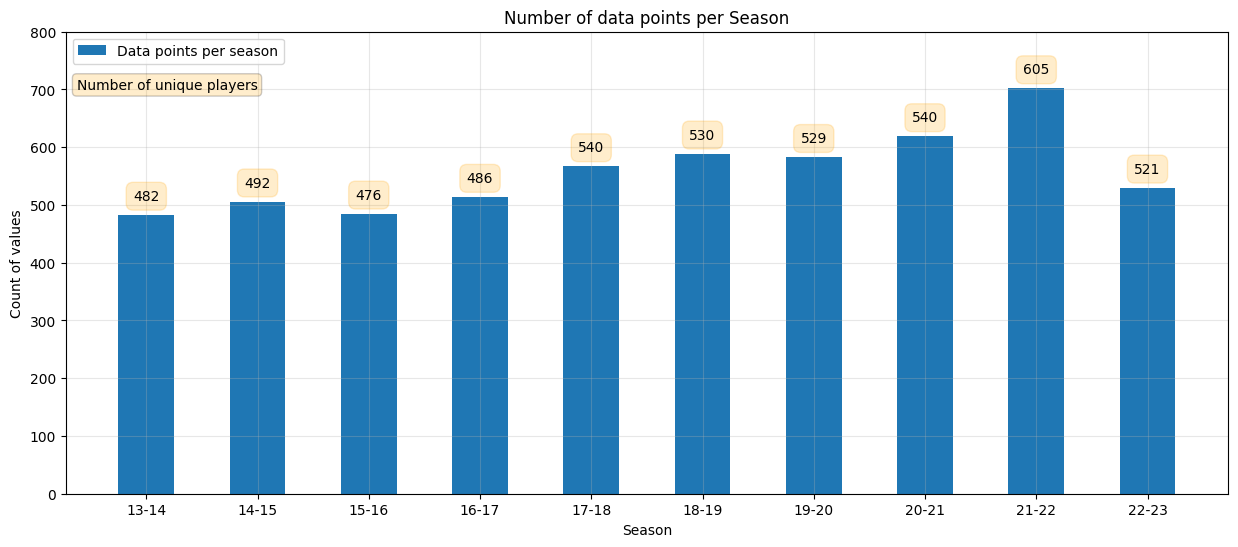

In [7]:
season_counts = db.groupby('SEASON').agg(count=('SEASON', 'size'), unique_players=('PLAYER_ID', 'nunique')).reset_index()
season_counts = season_counts.sort_values(by='SEASON')

plt.figure(figsize=(15, 6))
plt.bar(season_counts['SEASON'], season_counts['count'], label='Data points per season', width=0.5)

for i, row in season_counts.iterrows():
    plt.text(row['SEASON'], row['count'] + 20, 
             f'{row["unique_players"]}', 
             ha='center', 
             va='bottom', 
             fontsize=10, 
             bbox=dict(facecolor='orange', alpha=0.2, edgecolor='orange', boxstyle='round,pad=0.5'))

plt.title('Number of data points per Season')
plt.xlabel('Season')
plt.ylabel('Count of values')
plt.ylim(0, 800)
plt.grid(True, alpha=0.3)
plt.legend(['Data points per season'], loc='upper left')
props = dict(boxstyle='round', facecolor='orange', alpha=0.2)
plt.gca().text(0.165, 0.9, "Number of unique players", transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)
plt.show()


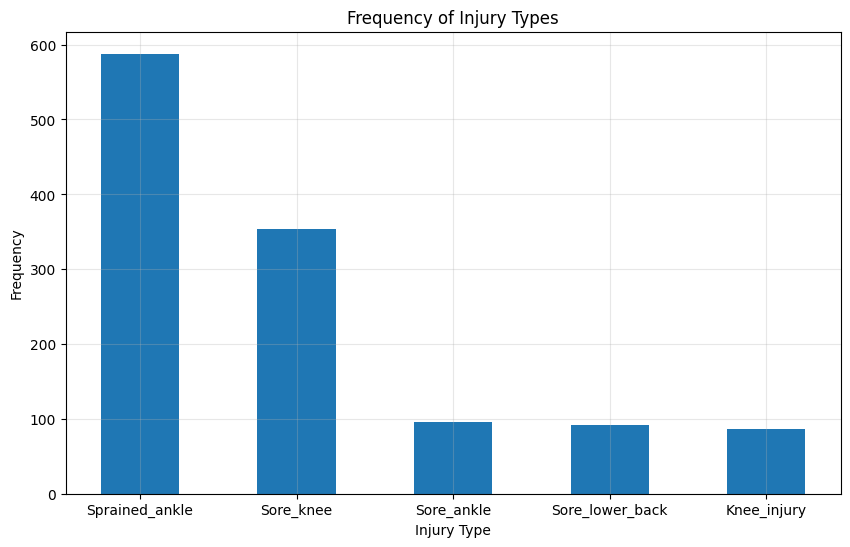

In [8]:
injury_type_counts = db['INJURED_TYPE'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(injury_type_counts.index, injury_type_counts.values, width=0.5)
plt.title('Frequency of Injury Types')
plt.xlabel('Injury Type')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


<Figure size 1500x600 with 0 Axes>

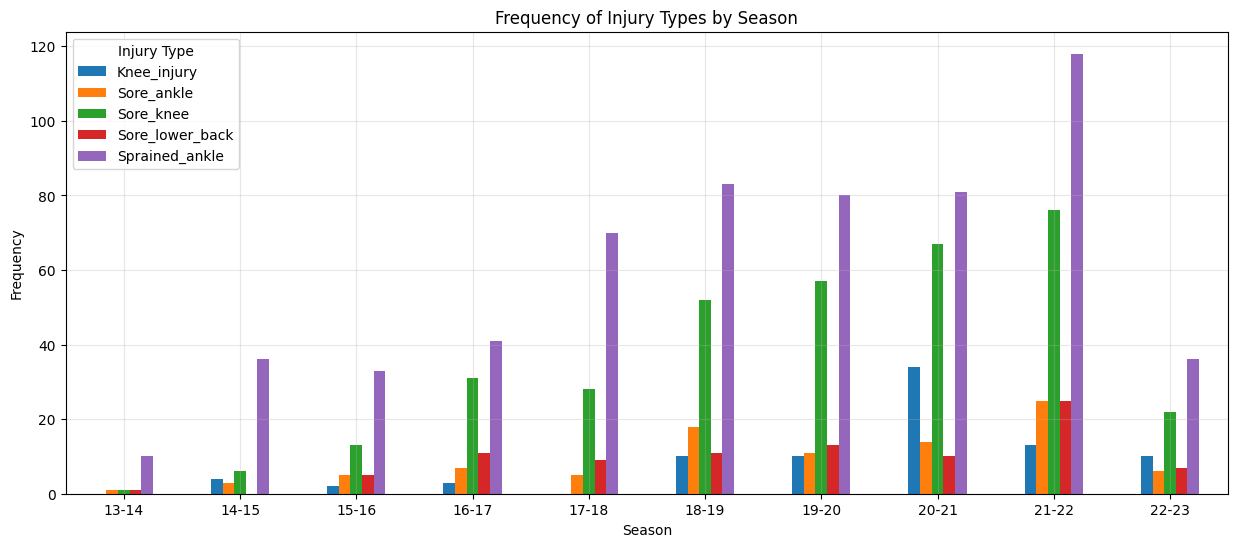

In [9]:
injury_type_season_counts = db.groupby(['SEASON', 'INJURED_TYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 6))
injury_type_season_counts.plot(kind='bar', width=0.5, figsize=(15, 6))
plt.title('Frequency of Injury Types by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.legend(title='Injury Type', loc='upper left')
plt.show()

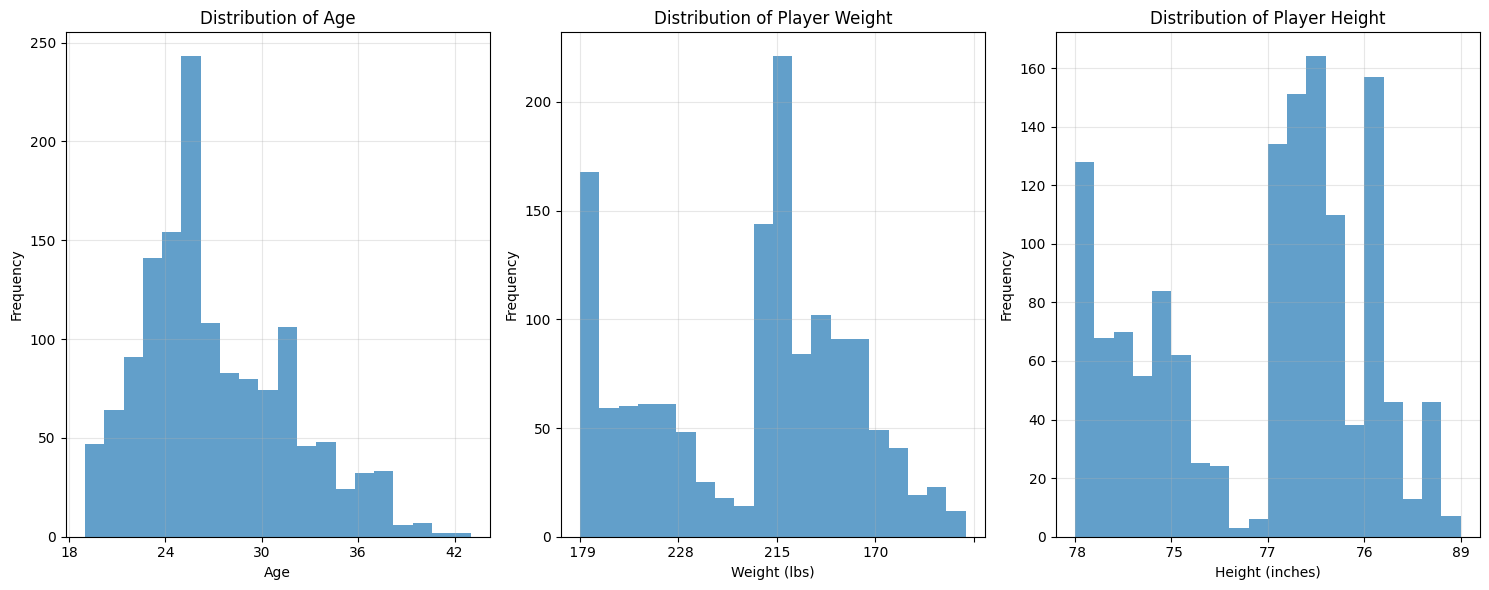

In [10]:
unique_players = db.drop_duplicates(subset='PLAYER_ID')

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

data = [
    (unique_players['AGE'].dropna(), 'Distribution of Age', 'Age'),
    (unique_players['PLAYER_WEIGHT'].dropna(), 'Distribution of Player Weight', 'Weight (lbs)'),
    (unique_players['PLAYER_HEIGHT_INCHES'].dropna(), 'Distribution of Player Height', 'Height (inches)')
]

for ax, (data_series, title, xlabel) in zip(axes, data):
    ax.hist(data_series, bins=20, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.tight_layout()
plt.show()


Number of unique players with no team: 1284
Number of unique players with a team: 107


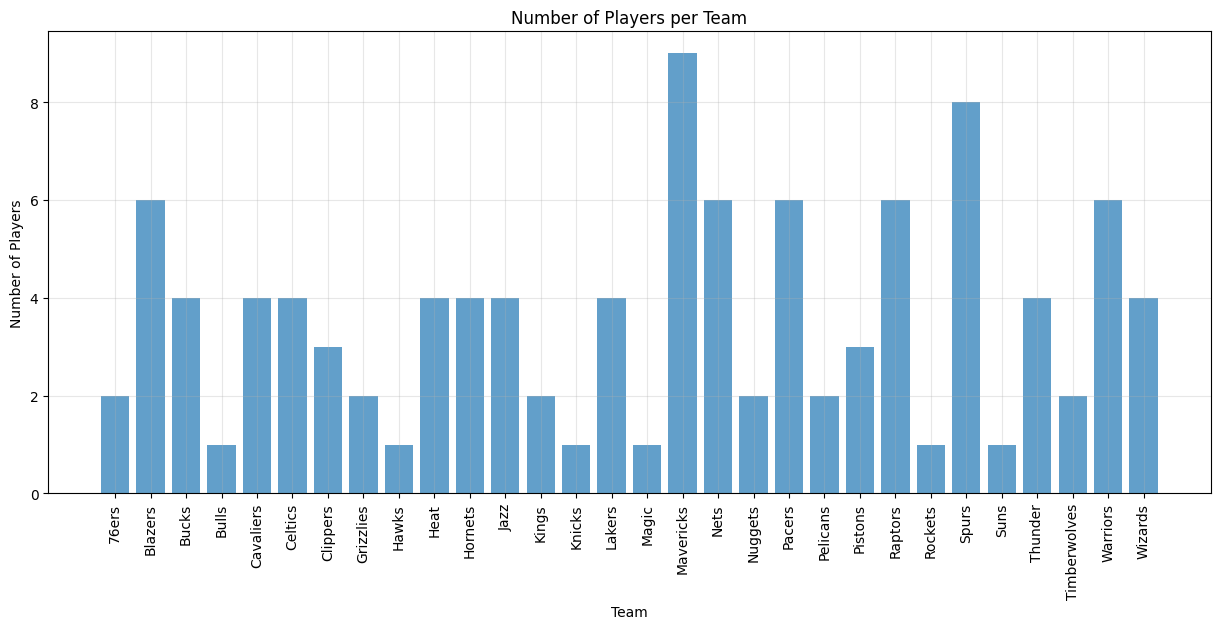

In [11]:
unique_teams = unique_players.groupby('TEAM').size().reset_index(name='Player Count')

num_unique_players_no_team = unique_players['TEAM'].isna().sum()
print(f"Number of unique players with no team: {num_unique_players_no_team}")

num_unique_players_with_team = unique_players['TEAM'].notna().sum()
print(f"Number of unique players with a team: {num_unique_players_with_team}")


plt.figure(figsize=(15, 6))
plt.bar(unique_teams['TEAM'], unique_teams['Player Count'], alpha=0.7)
plt.title('Number of Players per Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.show()

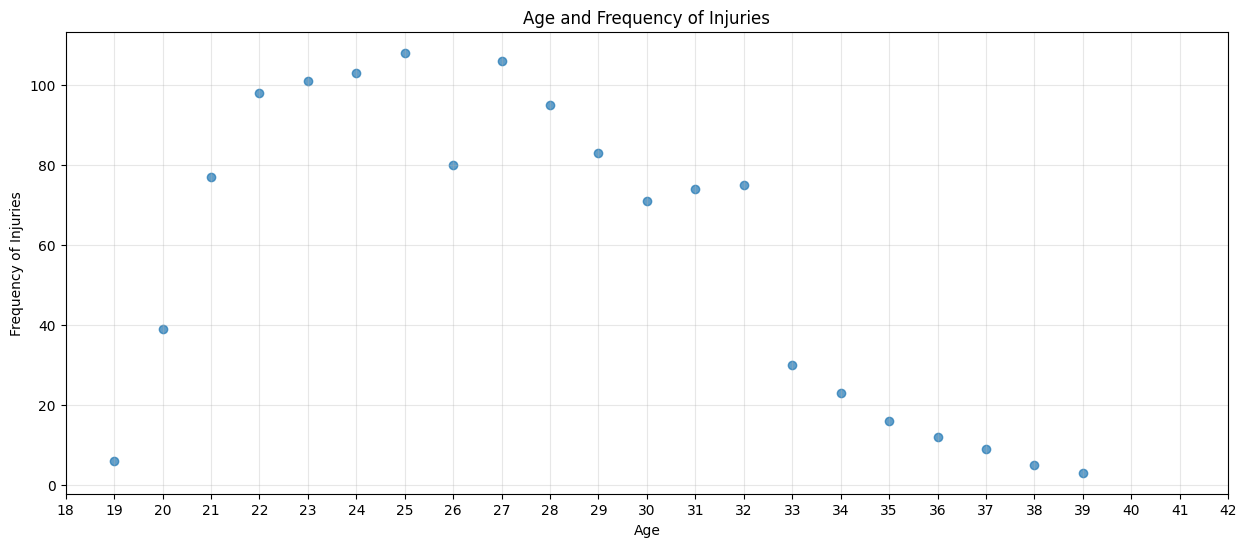

In [12]:
injury_age_counts = db[db['INJURED_TYPE'].notna()].groupby('AGE').size()

plt.figure(figsize=(15, 6))
plt.scatter(injury_age_counts.index, injury_age_counts.values, alpha=0.7)
plt.title('Age and Frequency of Injuries')
plt.xlabel('Age')
plt.ylabel('Frequency of Injuries')
plt.xticks(range(18, 43))
plt.grid(True, alpha=0.3)
plt.show()


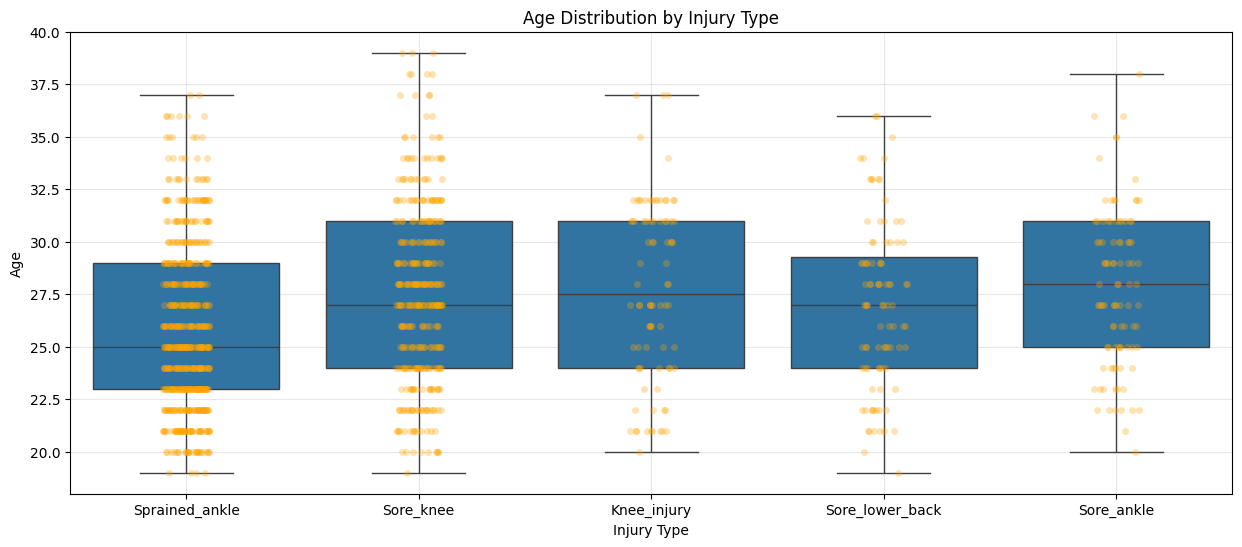

In [24]:
injury_types = db['INJURED_TYPE'].dropna().unique()

plt.figure(figsize=(15, 6))
sns.boxplot(x='INJURED_TYPE', y='AGE', data=db[db['INJURED_TYPE'].notna()], showfliers=True)
sns.stripplot(x='INJURED_TYPE', y='AGE', data=db[db['INJURED_TYPE'].notna()], color='orange', alpha=0.3, jitter=True)
plt.title('Age Distribution by Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)
plt.show()


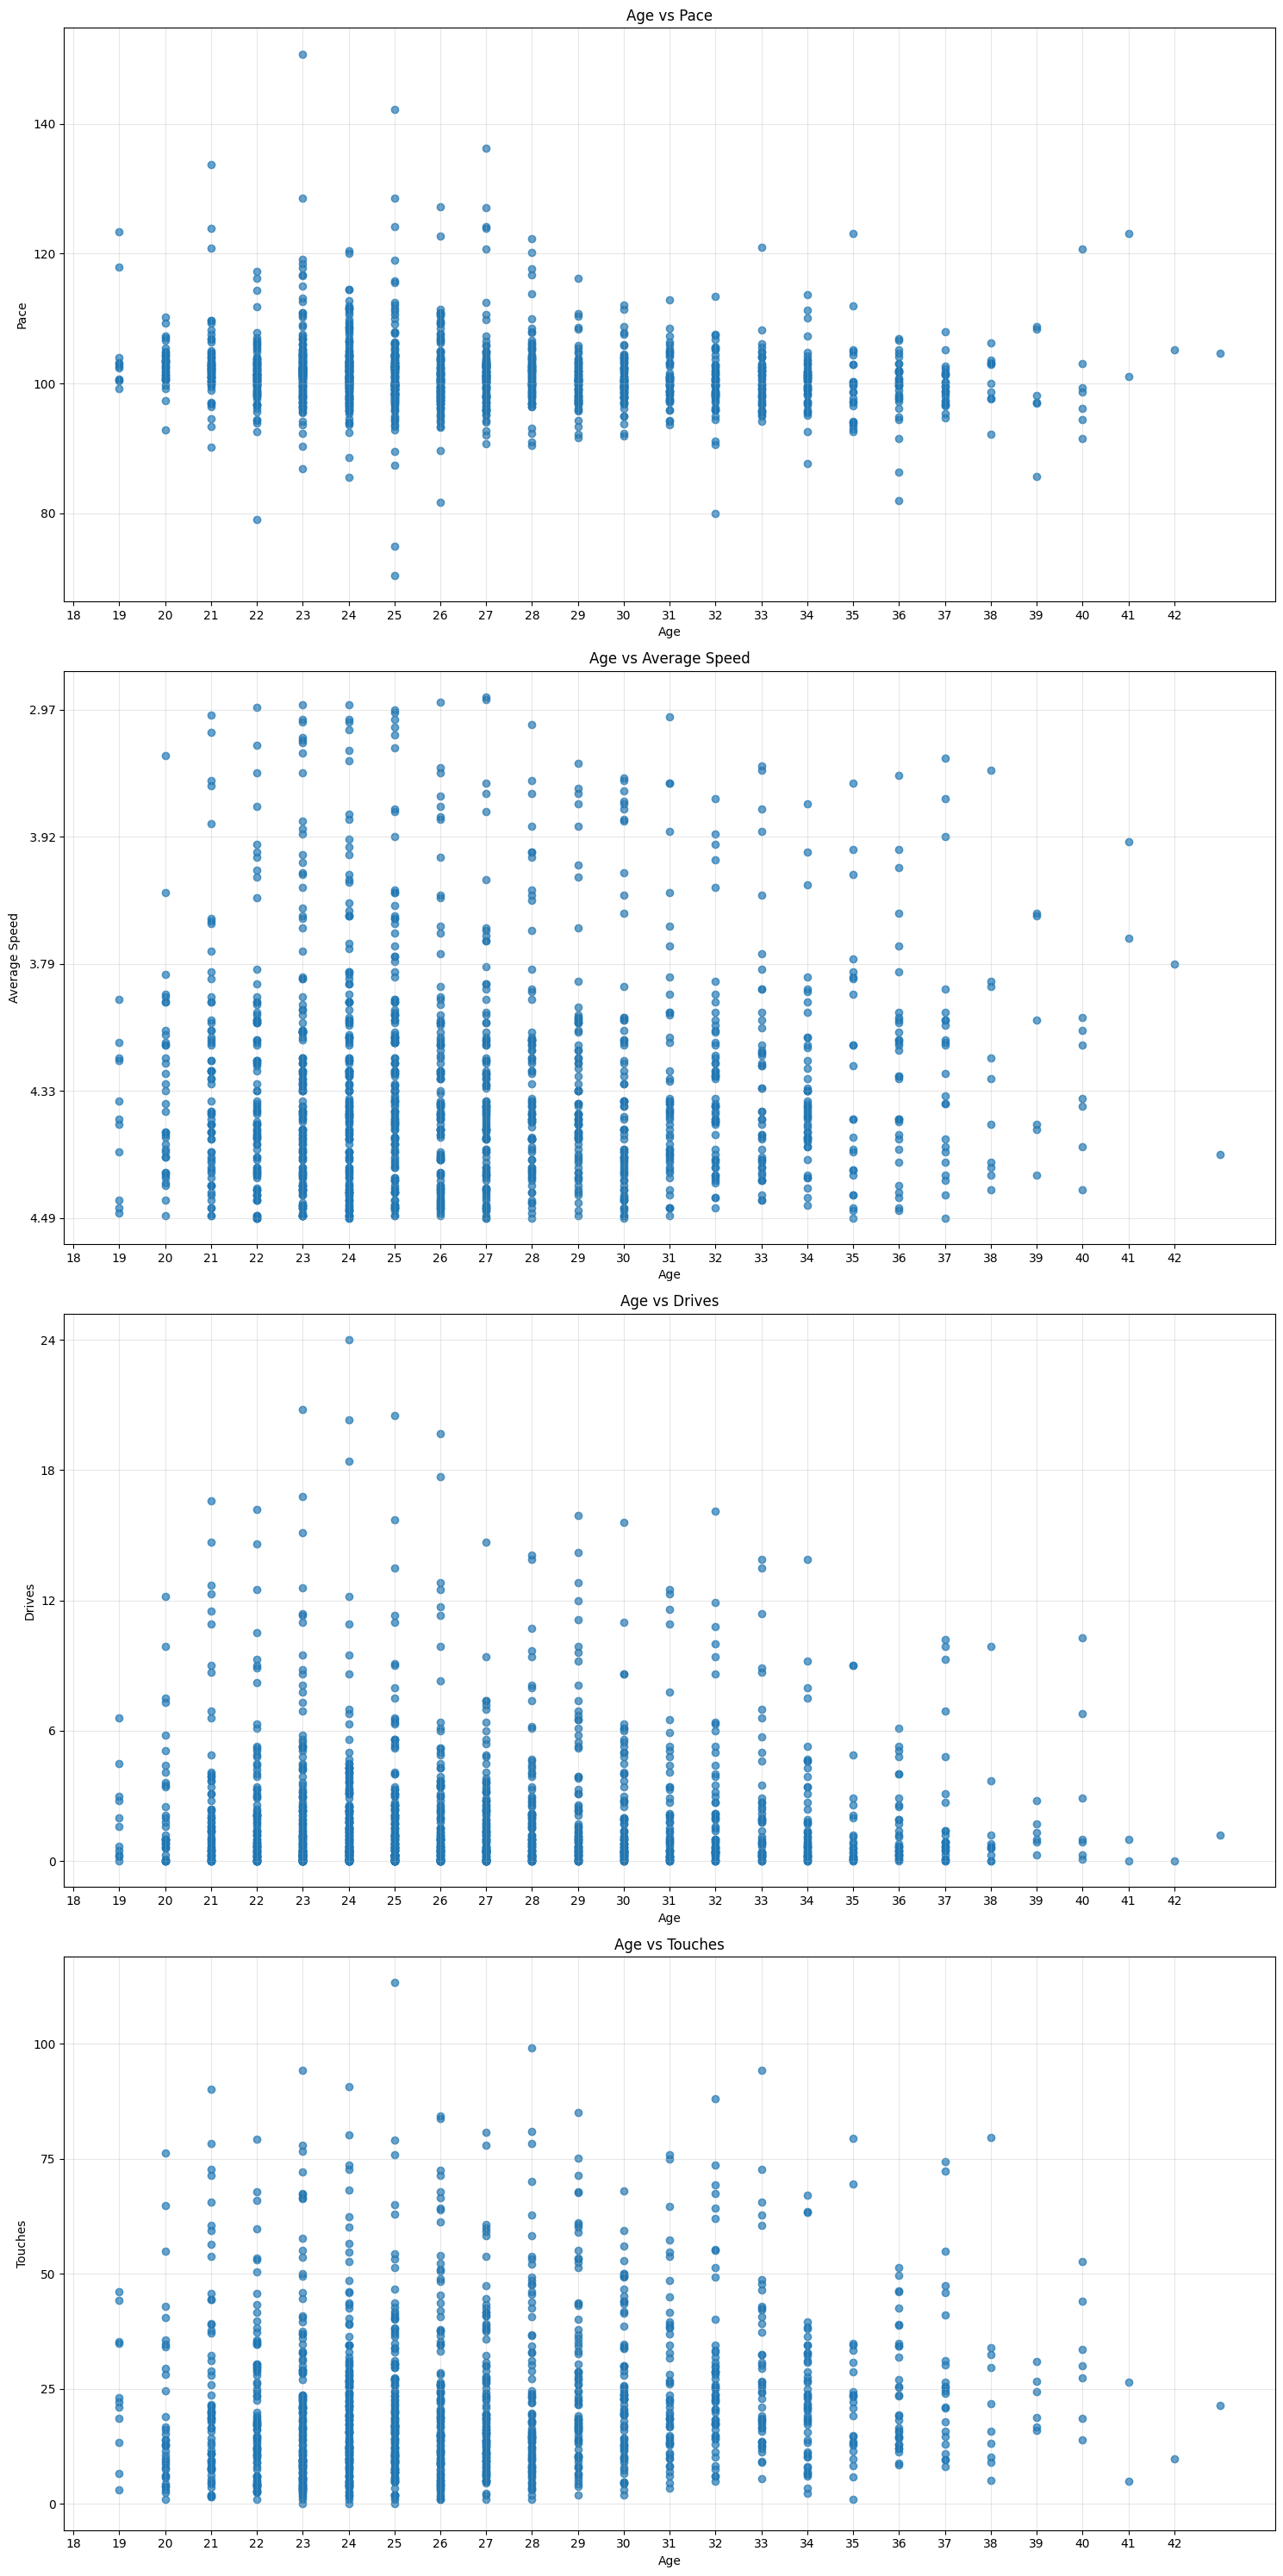

In [13]:
unique_players = db.drop_duplicates(subset='PLAYER_ID')

fig, axes = plt.subplots(4, 1, figsize=(15, 30))

data = [
    (unique_players['AGE'], unique_players['PACE'], 'Age vs Pace', 'Pace'),
    (unique_players['AGE'], unique_players['AVG_SPEED'], 'Age vs Average Speed', 'Average Speed'),
    (unique_players['AGE'], unique_players['DRIVES'], 'Age vs Drives', 'Drives'),
    (unique_players['AGE'], unique_players['TOUCHES'], 'Age vs Touches', 'Touches')
]

for ax, (x_data, y_data, title, ylabel) in zip(axes.flatten(), data):
    ax.scatter(x_data, y_data, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Age')
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(18, 43))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.tight_layout()
plt.show()